# EDA of Rossmann Store Sales

## 1. Data Collection 

### 1.1 Import Necessary Library

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy import stats
from graphviz import Digraph
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import warnings
import logging
warnings.filterwarnings("ignore")


# Sample Data for DataFrame (replace this with your actual data)
data = {
    'competition_distance': [1000, 1500, 2000, 2500, 3000],
    'sales': [2000, 3000, 4000, 3500, 5000]
}
# Create DataFrame
df = pd.DataFrame(data)

sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../data'))



In [2]:
from data_processing import load_data, clean_data, handle_missing_values
from sale_analysis import (
    plot_sales_distribution, compare_sales_holidays, seasonal_behavior,
    correlation_analysis, promo_effect, effective_promo_deployment,
    customer_behavior_trends, weekday_openings, assortment_type_impact,
    competitor_distance_impact, new_competitor_effects, plot_promo_distribution,
    plot_sales_during_holidays, plot_sales_customers_corr, plot_store_corr
)

2025-01-03 21:47:40,828 - INFO - Data loaded successfully from ../data/train.csv
2025-01-03 21:47:40,849 - INFO - Data loaded successfully from ../data/test.csv
2025-01-03 21:47:40,853 - INFO - Data loaded successfully from ../data/store.csv


### 1.2 Load Dataset

In [3]:

# Load datasets
train_data = load_data('../data/train.csv')
test_data = load_data('../data/test.csv')
store_data = load_data('../data/store.csv')

2025-01-03 21:47:41,399 - INFO - Data loaded successfully from ../data/train.csv
2025-01-03 21:47:41,421 - INFO - Data loaded successfully from ../data/test.csv
2025-01-03 21:47:41,426 - INFO - Data loaded successfully from ../data/store.csv


In [4]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 2. Data Preprocessing

### 2.1 Stastical Analysis

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [11]:
train_data.size

9154881

In [12]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### 2.2 Data Cleaning

In [16]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [18]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [19]:
# Clean datasets
train_data = clean_data(train_data)
test_data = clean_data(test_data)

# Merge datasets
merged_test_data = pd.merge(test_data, store_data, on='Store')
merged_data = pd.merge(train_data, store_data, on='Store')
merged_data.head()

2025-01-03 21:47:42,451 - INFO - Data cleaned successfully
2025-01-03 21:47:42,462 - INFO - Data cleaned successfully


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
merged_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [21]:
# Handle missing values after merging
merged_train_data = handle_missing_values(merged_data)
merged_test_data = handle_missing_values(merged_test_data)

2025-01-03 21:47:43,133 - INFO - Missing values handled successfully
2025-01-03 21:47:43,145 - INFO - Missing values handled successfully


In [22]:
merged_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## 3.  Explanatory Data Analysis

### 3.1 Distrbution of Features

Distrbution of Traning and Testing data

2025-01-03 21:47:47,331 - WARNING - The 'Sales' column is missing from the test data. Only training data will be plotted.
2025-01-03 21:47:47,467 - INFO - Sales distribution comparison plot saved as sales_distribution_comparison.png


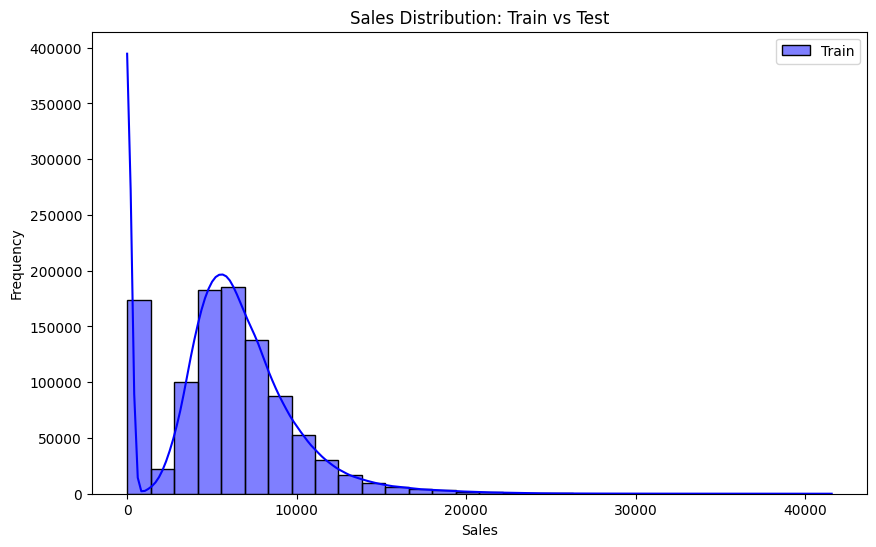

In [23]:
# Distribution Analysis
plot_sales_distribution(train_data, test_data)

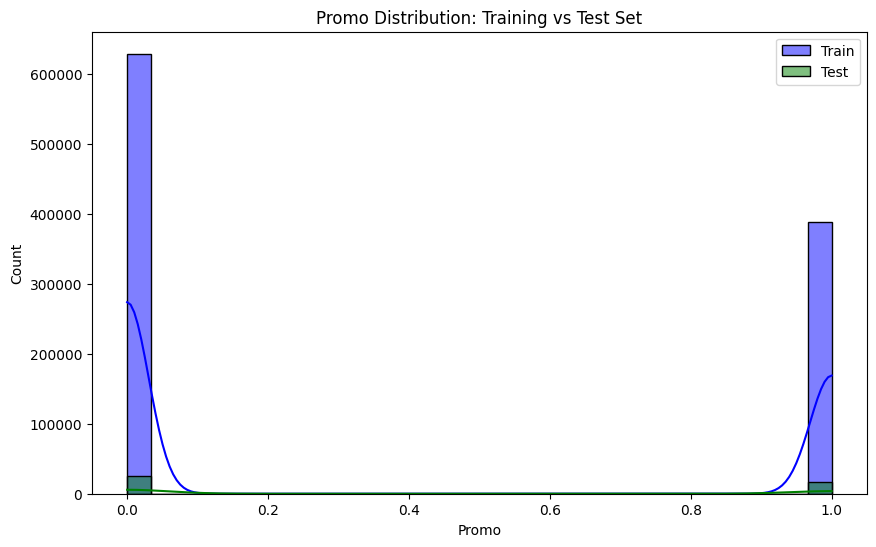

In [24]:
# Compare promo distribution in training and test set
plot_promo_distribution()  

Distrbution of Store Data

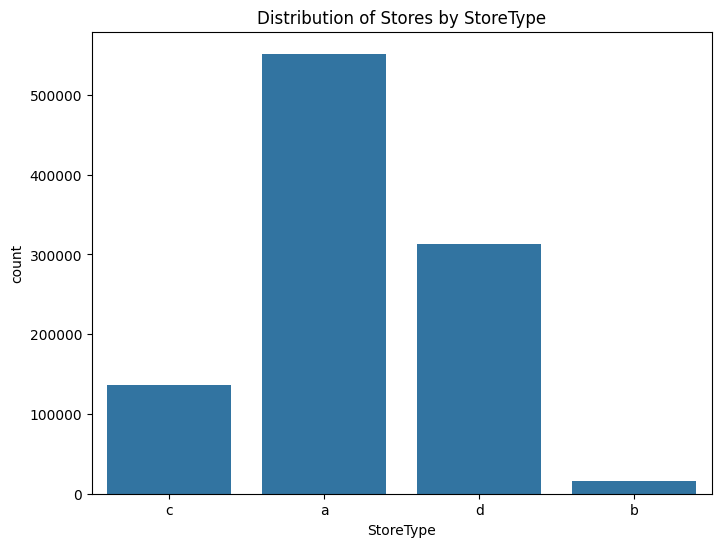

In [25]:
# Distribution of the stores based on StoreType
plt.figure(figsize=(8, 6))
sns.countplot(x='StoreType', data=merged_data)
plt.title("Distribution of Stores by StoreType")
plt.show()

Distrbution of Stores Based On assortment

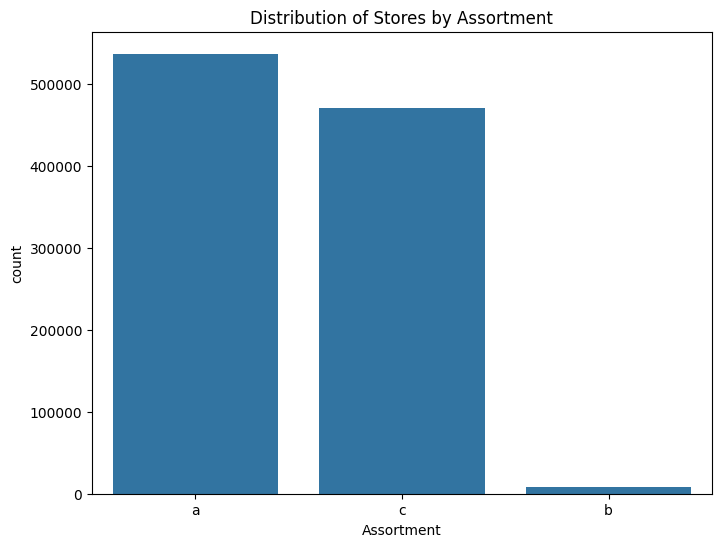

In [26]:
# Distribution of the stores based on Assortment type
plt.figure(figsize=(8, 6))
sns.countplot(x='Assortment', data=merged_data)
plt.title("Distribution of Stores by Assortment")
plt.show()

Distrbution Of Compitation Distance

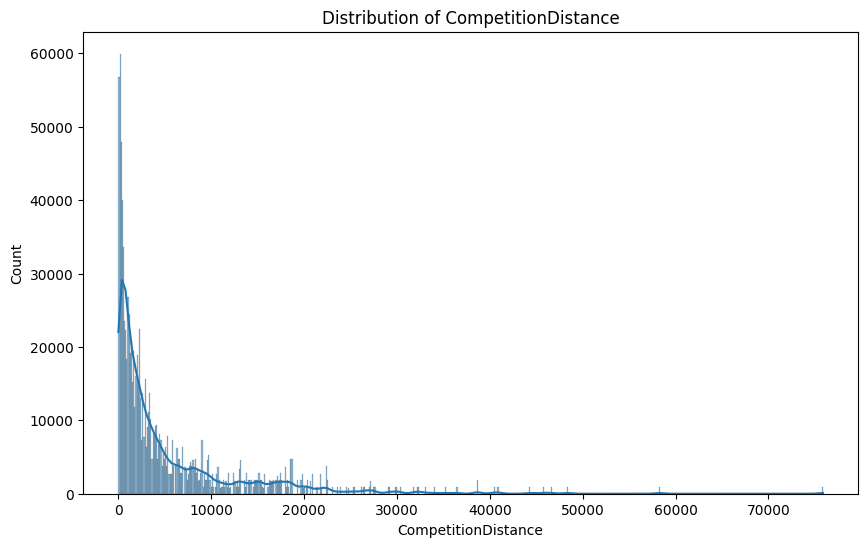

In [27]:
# Check the distribution of CompetitionDistance
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['CompetitionDistance'], kde=True)
plt.title('Distribution of CompetitionDistance')
plt.show()

### 3.2 Sale Behaviour Analysis

#### Sales Behavior During Holidays

2025-01-03 21:47:58,650 - INFO - Holiday sales comparison plot saved as holiday_sales_comparison.png


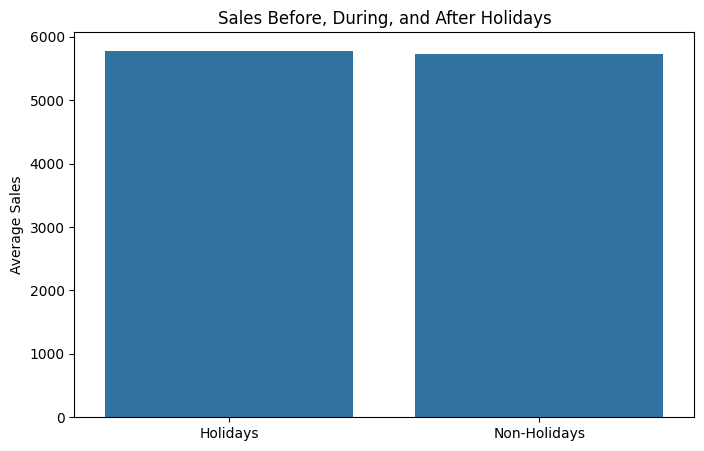

In [28]:
# Sales Behavior During Holidays
compare_sales_holidays(merged_data)

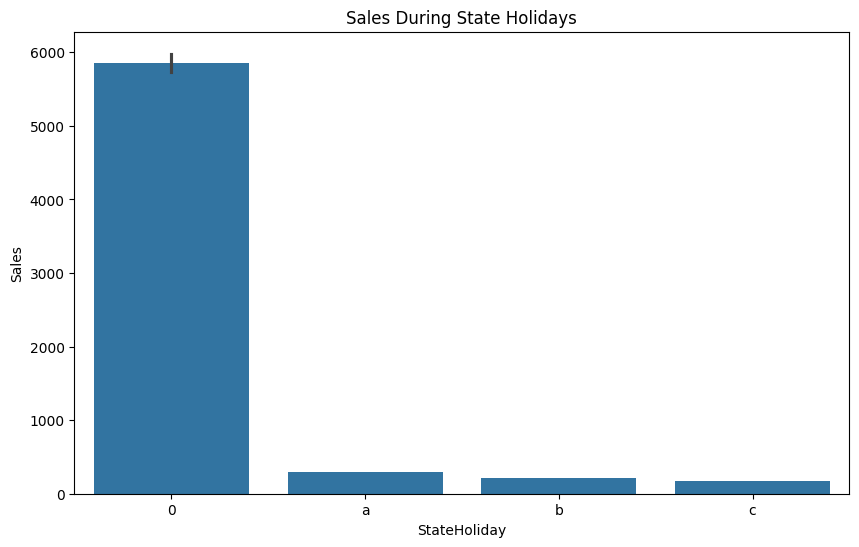

In [29]:
# Group by holidays and calculate average sales
holiday_sales = merged_data.groupby('StateHoliday')['Sales'].mean().reset_index()

# Plotting sales before, during, and after holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
plt.title('Sales During State Holidays')
plt.show()

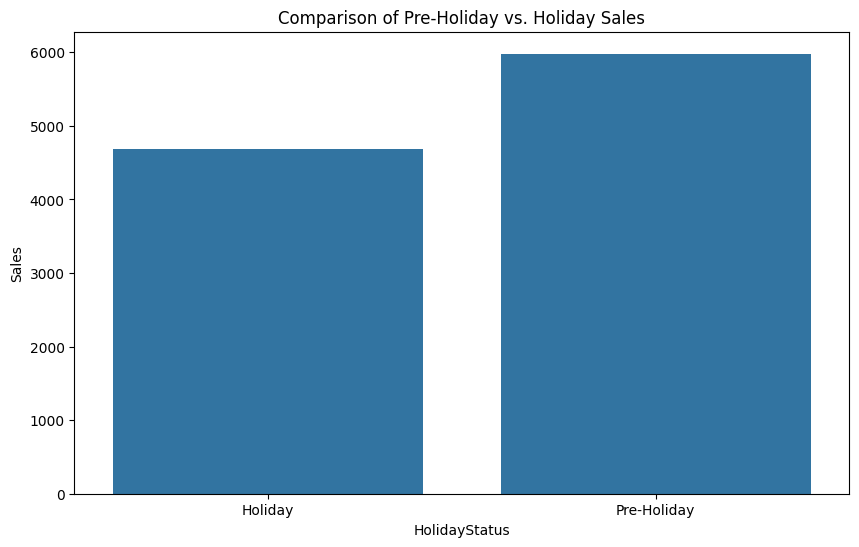

In [30]:
# Adding a new column to classify pre-holiday and holiday sales
merged_data['HolidayStatus'] = merged_data['StateHoliday'].apply(lambda x: 'Holiday' if x != '0' else 'Pre-Holiday')

# Group by HolidayStatus and calculate the average sales
holiday_comparison = merged_data.groupby('HolidayStatus')['Sales'].mean().reset_index()

# Plotting pre-holiday vs. holiday sales
plt.figure(figsize=(10, 6))
sns.barplot(x='HolidayStatus', y='Sales', data=holiday_comparison)
plt.title('Comparison of Pre-Holiday vs. Holiday Sales')
plt.show()


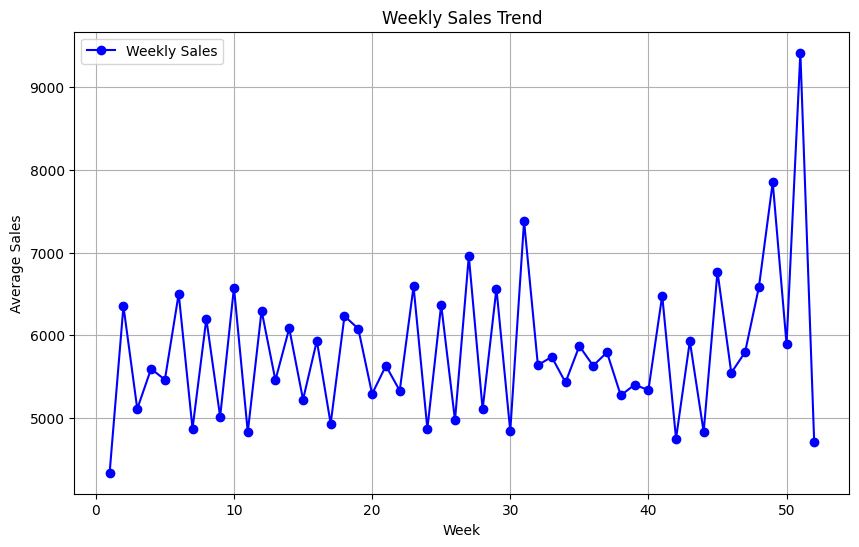

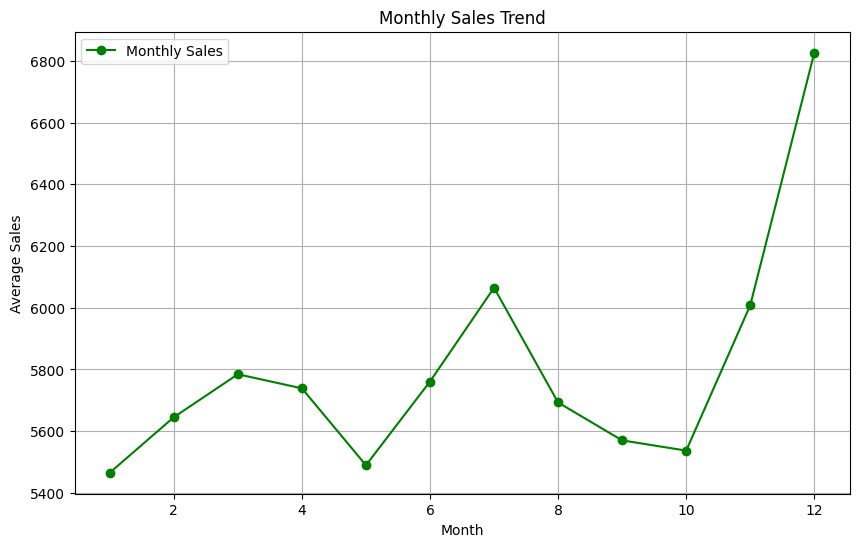

In [31]:
# Convert 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Extract week and month from the 'Date' column
merged_data['Week'] = merged_data['Date'].dt.isocalendar().week
merged_data['Month'] = merged_data['Date'].dt.month

# Group by Week and Month to calculate average sales
weekly_sales = merged_data.groupby('Week')['Sales'].mean().reset_index()
monthly_sales = merged_data.groupby('Month')['Sales'].mean().reset_index()

# Plotting weekly sales trend
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Sales'], label='Weekly Sales', color='blue', marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plotting monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], label='Monthly Sales', color='green', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()


### 3.3. Seasonal Purchasing Behaviour

#### Trends of Monthly Purchasing Behaviour

2025-01-03 21:48:00,044 - INFO - /home/yonas/KAIM2W4-rossmann-sales-forecast-main/src/../notebook/plots/Seasonal sales plot saved as seasonal_sales.png


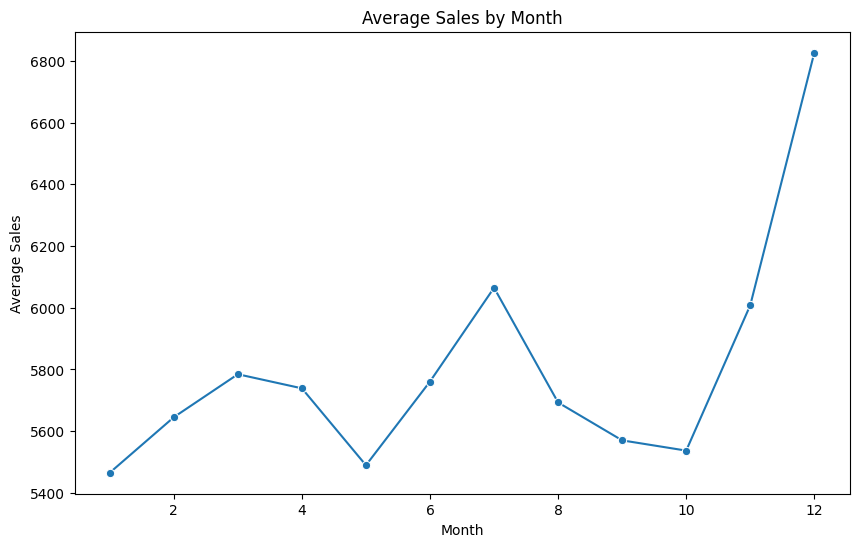

In [32]:
# Seasonal Purchase Behavior
seasonal_behavior(merged_data)

### 3.4 Correlation Analysis

2025-01-03 21:48:00,165 - INFO - Correlation between Sales and Customers: 0.8947107733017018
2025-01-03 21:48:03,284 - INFO - Sales vs Customers correlation plot saved as sales_customers_correlation.png


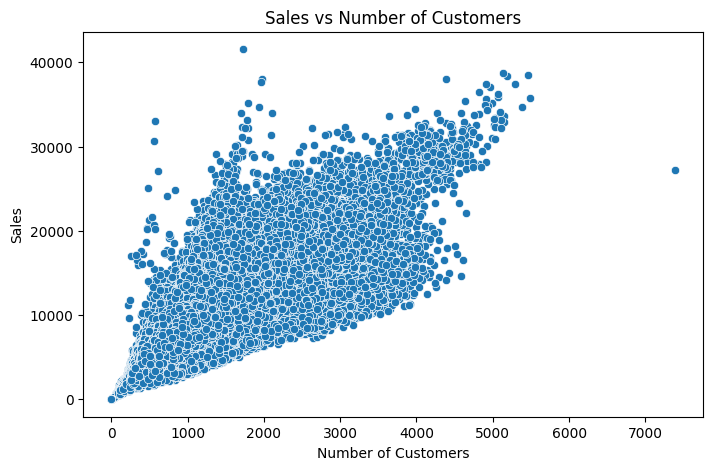

In [33]:
# Correlation Analysis
correlation_analysis(merged_data)

#### Investigate the correlation between `Sales` and `Customers`.

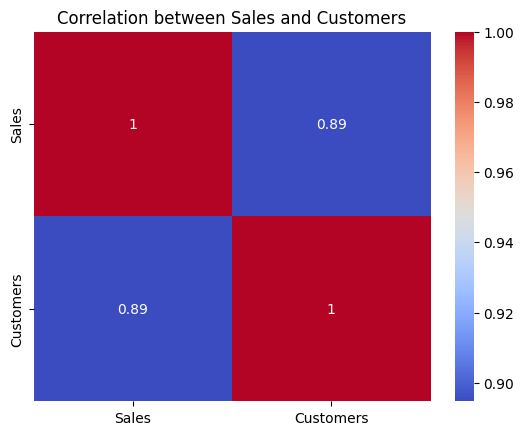

In [34]:
# Correlation analysis
plot_sales_customers_corr() 

#### Correlation Between Whole Features

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Convert 'StoreType', 'Assortment', and 'PromoInterval' from strings to numeric codes
store_data['StoreType'] = label_encoder.fit_transform(store_data['StoreType'])
store_data['Assortment'] = label_encoder.fit_transform(store_data['Assortment'])

# For 'PromoInterval', first replace missing values with 'None', then apply label encoding
store_data['PromoInterval'].fillna('None', inplace=True)
store_data['PromoInterval'] = label_encoder.fit_transform(store_data['PromoInterval'])

# Now check the correlation
correlation_matrix = store_data.corr()

# Display correlation matrix
correlation_matrix

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,1.000000,-0.020977,0.003913,-0.027220,-0.050319,-0.004648,0.007486,0.007584,0.039640,-0.011256
StoreType,-0.020977,1.000000,0.234372,0.080184,0.024911,0.029110,0.086597,-0.021537,-0.072907,-0.070205
Assortment,0.003913,0.234372,1.000000,0.144826,0.001044,0.060901,-0.000057,-0.082130,0.046652,0.030929
CompetitionDistance,-0.027220,0.080184,0.144826,1.000000,-0.059126,0.025124,-0.145717,-0.060552,-0.109504,0.130789
CompetitionOpenSinceMonth,-0.050319,0.024911,0.001044,-0.059126,1.000000,-0.052250,-0.011485,-0.035504,0.047815,0.004228
CompetitionOpenSinceYear,-0.004648,0.029110,0.060901,0.025124,-0.052250,1.000000,-0.076520,-0.079984,0.006354,0.065026
Promo2,0.007486,0.086597,-0.000057,-0.145717,-0.011485,-0.076520,1.000000,NaN,NaN,-0.912003
Promo2SinceWeek,0.007584,-0.021537,-0.082130,-0.060552,-0.035504,-0.079984,NaN,1.000000,-0.217650,-0.039358
Promo2SinceYear,0.039640,-0.072907,0.046652,-0.109504,0.047815,0.006354,NaN,-0.217650,1.000000,0.140825
PromoInterval,-0.011256,-0.070205,0.030929,0.130789,0.004228,0.065026,-0.912003,-0.039358,0.140825,1.000000


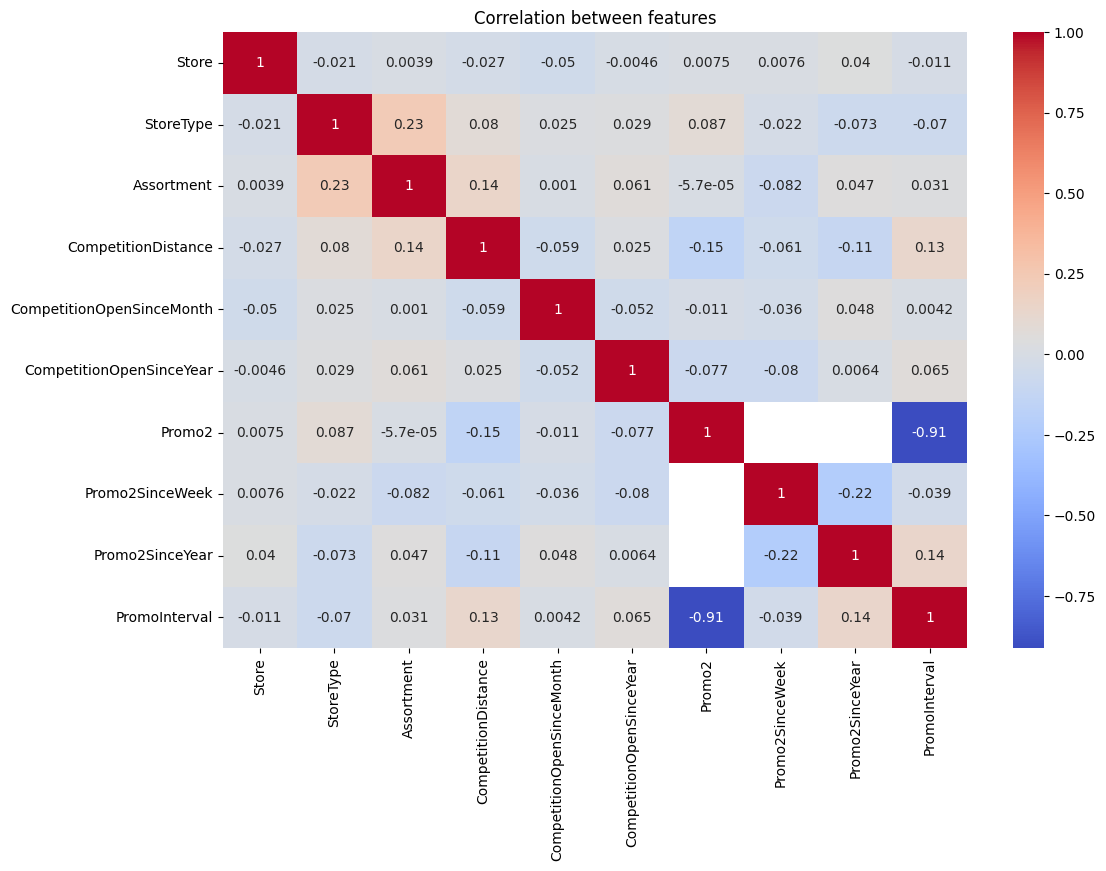

In [36]:
# Correlation analysis between features
plt.figure(figsize=(12, 8))
sns.heatmap(store_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

### 3.5 Promo Effects

##### Analyze how promos impact sales and customer behavior.

2025-01-03 21:48:05,841 - INFO - Promo effect plot saved as promo_effect.png


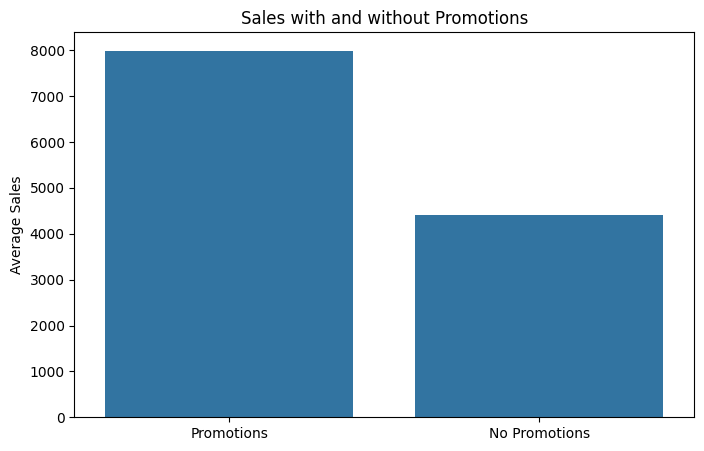

In [37]:
# Promo Effects
promo_effect(merged_data)

##### Analyze the effect of promos on sales

In [38]:
def promo_analysis(merged_data):
    promo_data = merged_data.groupby('Promo2').mean()['CompetitionDistance']
    print(f"Average CompetitionDistance with Promo2: \n{promo_data}")

promo_analysis(store_data)

Average CompetitionDistance with Promo2: 
Promo2
0    6549.520295
1    4316.508772
Name: CompetitionDistance, dtype: float64


2025-01-03 21:48:05,980 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:48:05,989 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


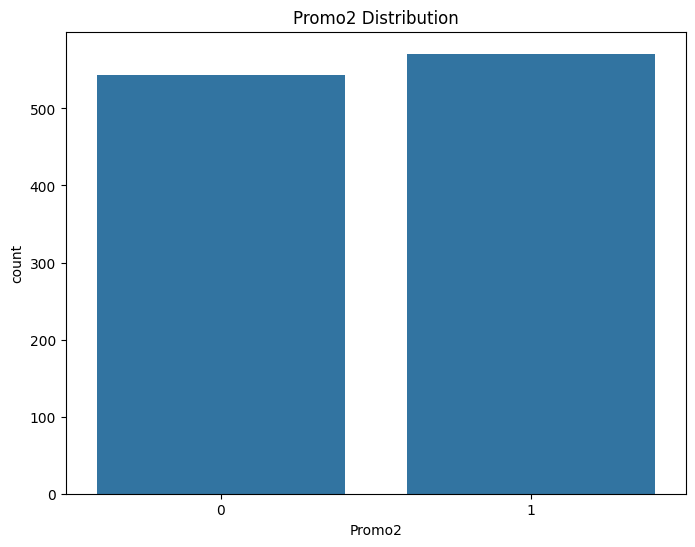

In [39]:
# Promo2 distribution analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Promo2', data=store_data)
plt.title("Promo2 Distribution")
plt.show()

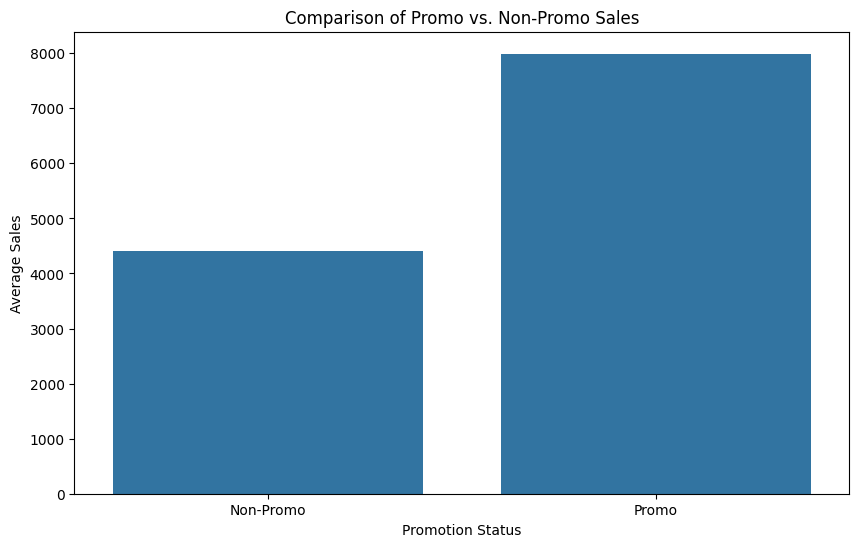

In [40]:
# Group by Promo and calculate average sales
promo_comparison = merged_data.groupby('Promo')['Sales'].mean().reset_index()

# Map Promo values to 'Promo' and 'Non-Promo' for better labeling
promo_comparison['Promo'] = promo_comparison['Promo'].map({1: 'Promo', 0: 'Non-Promo'})

# Plotting promo vs. non-promo sales comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_comparison)
plt.title('Comparison of Promo vs. Non-Promo Sales')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.show()

2025-01-03 21:48:06,415 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:48:06,427 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:48:11,318 - INFO - Store promo effect plot saved as store_promo_effect.png


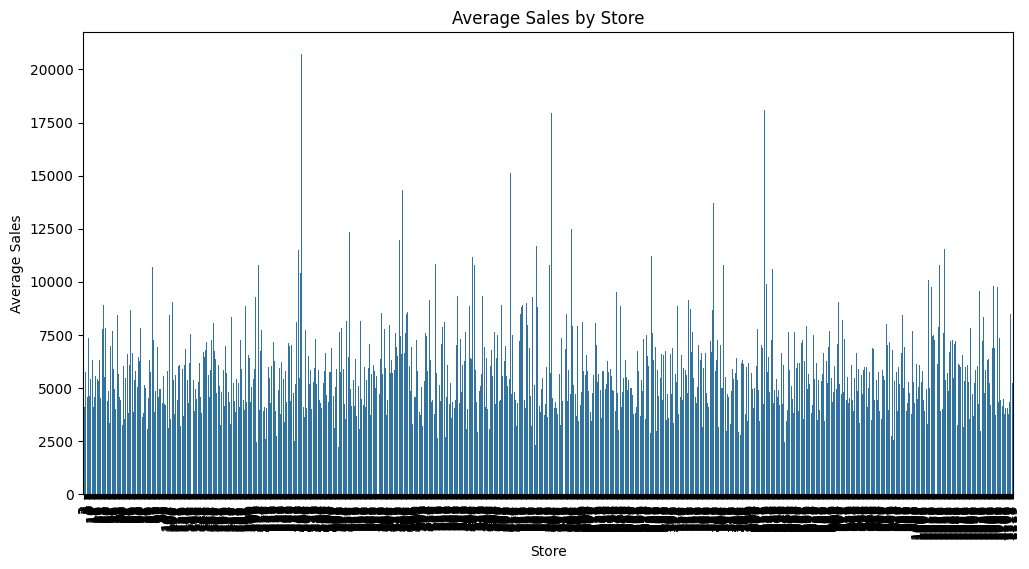

In [41]:
# Effective Promo Deployment
effective_promo_deployment(merged_data)

### 3.6 Customer Behavior Trends

2025-01-03 21:48:25,734 - INFO - Customer behavior trends plot saved as customer_behavior_trends.png


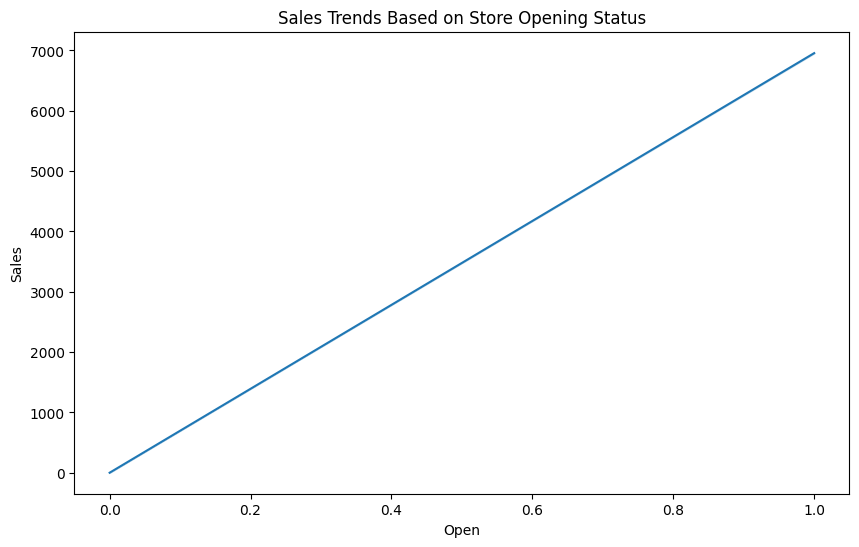

In [42]:
# Customer Behavior Trends
customer_behavior_trends(merged_data)

In [43]:
# Weekday Store Openings
weekday_openings(merged_data)

2025-01-03 21:48:25,999 - INFO - Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 

2025-01-03 21:48:26,195 - INFO - Assortment impact plot saved as assortment_impact.png


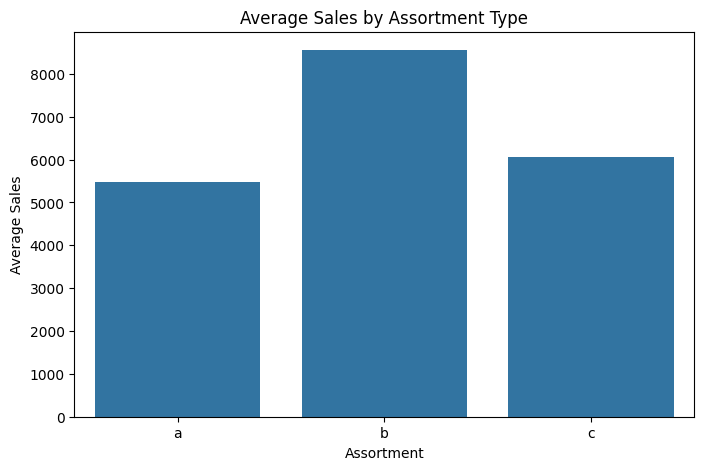

In [44]:
# Assortment Type Impact
assortment_type_impact(merged_data)

### 3.7 Competitor Distance Impact

2025-01-03 21:48:29,338 - INFO - Competitor distance impact plot saved as competitor_distance_impact.png


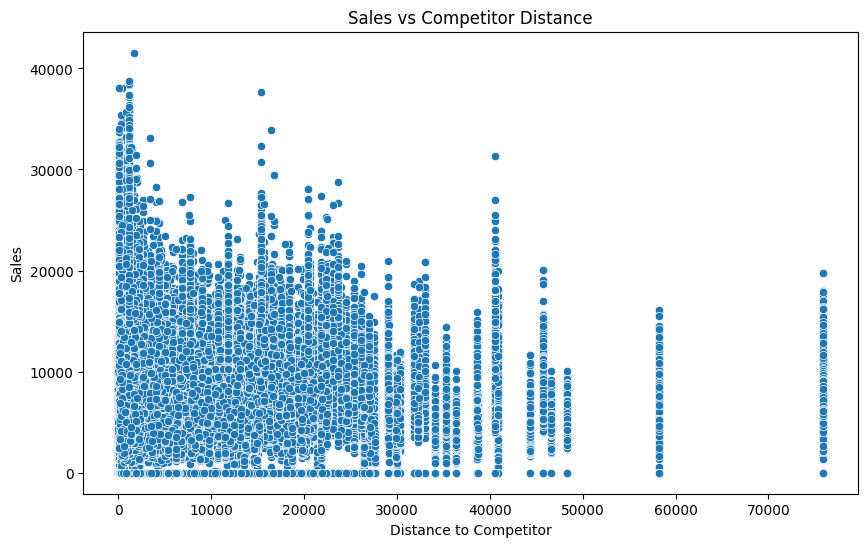

In [45]:
# Competitor Distance Impact
competitor_distance_impact(merged_data)

2025-01-03 21:48:30,933 - INFO - New competitor effects plot saved as new_competitor_effects.png


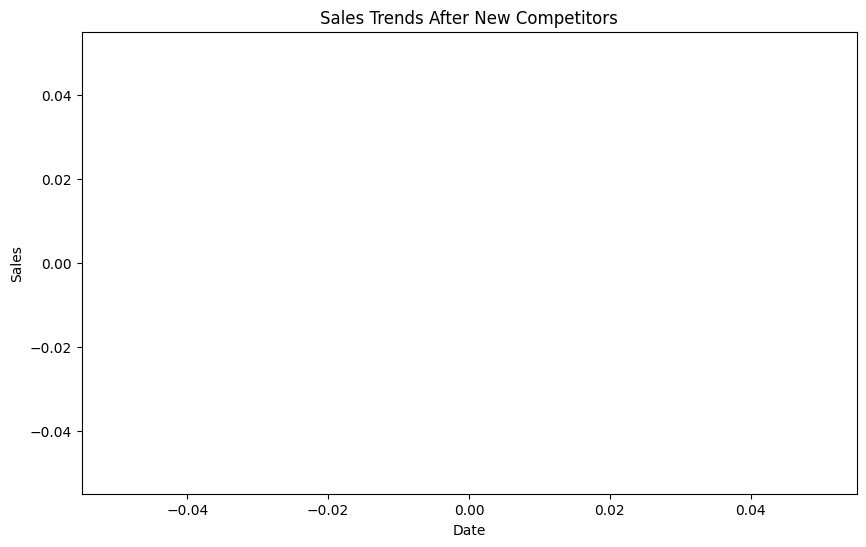

In [46]:
# New Competitor Effects
new_competitor_effects(merged_data)

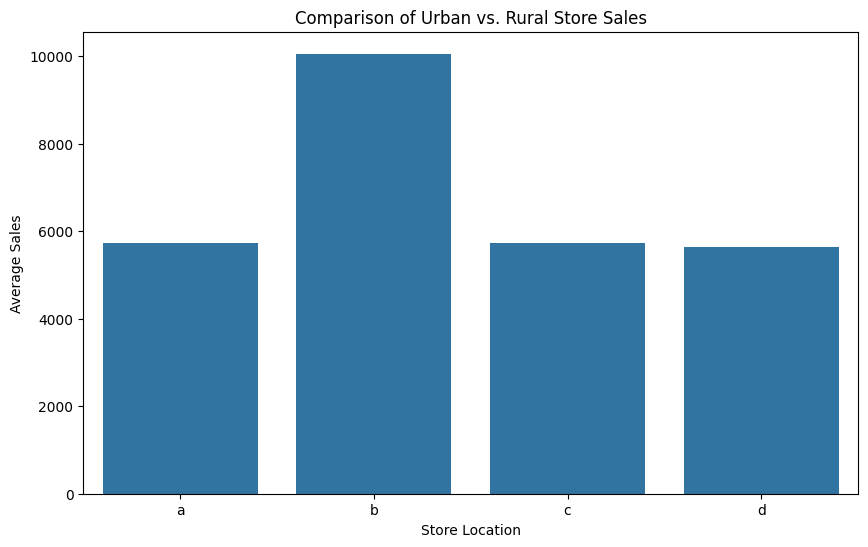

In [47]:
# Group by StoreType and calculate average sales
location_comparison = merged_data.groupby('StoreType')['Sales'].mean().reset_index()

# Plotting urban vs. rural store sales comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=location_comparison)
plt.title('Comparison of Urban vs. Rural Store Sales')
plt.xlabel('Store Location')
plt.ylabel('Average Sales')
plt.show()

In [49]:
# Create a graph
dot = Digraph(comment='External Factors Affecting Sales')

# Define external factors affecting sales
dot.node('A', 'Economic Factors')
dot.node('B', 'Seasonality')
dot.node('C', 'Weather')
dot.node('D', 'Competition')
dot.node('E', 'Market Trends')
dot.node('F', 'Advertising/Promotion')
dot.node('G', 'Social Factors')
dot.node('H', 'Political/Regulatory Factors')

# Connect factors to 'Sales'
dot.node('S', 'Sales')
dot.edge('A', 'S')
dot.edge('B', 'S')
dot.edge('C', 'S')
dot.edge('D', 'S')
dot.edge('E', 'S')
dot.edge('F', 'S')
dot.edge('G', 'S')
dot.edge('H', 'S')

# Render the diagram
dot.render('external_factors_sales', format='png', view=True)

'external_factors_sales.png'

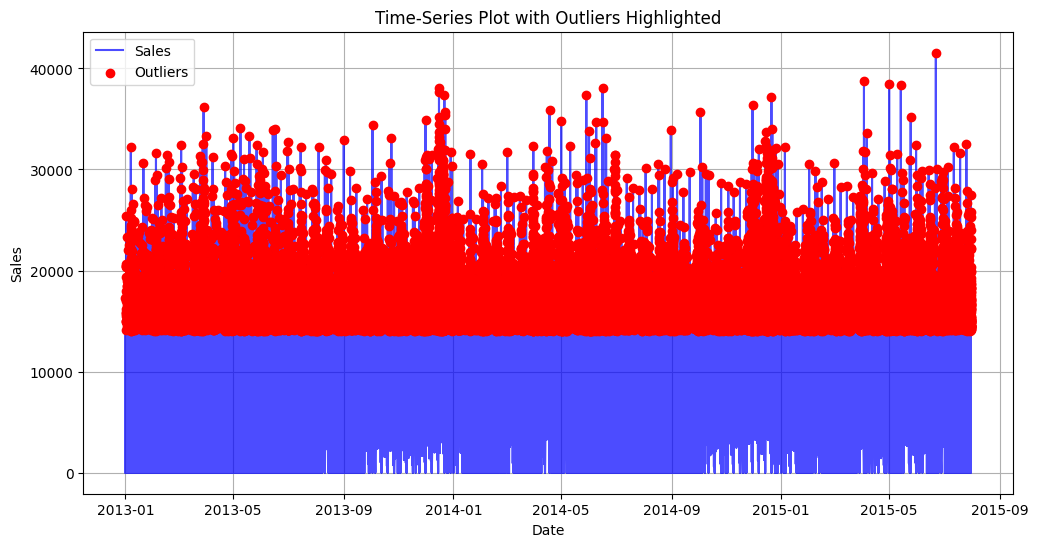

In [50]:
# Convert 'Date' to datetime if not already
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Calculate IQR to detect outliers in the 'Sales' column
Q1 = merged_data['Sales'].quantile(0.25)
Q3 = merged_data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as sales values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = merged_data[(merged_data['Sales'] < (Q1 - 1.5 * IQR)) | (merged_data['Sales'] > (Q3 + 1.5 * IQR))]

# Plotting the time-series with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Sales'], label='Sales', color='blue', alpha=0.7)
plt.scatter(outliers['Date'], outliers['Sales'], color='red', label='Outliers', zorder=5)
plt.title('Time-Series Plot with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

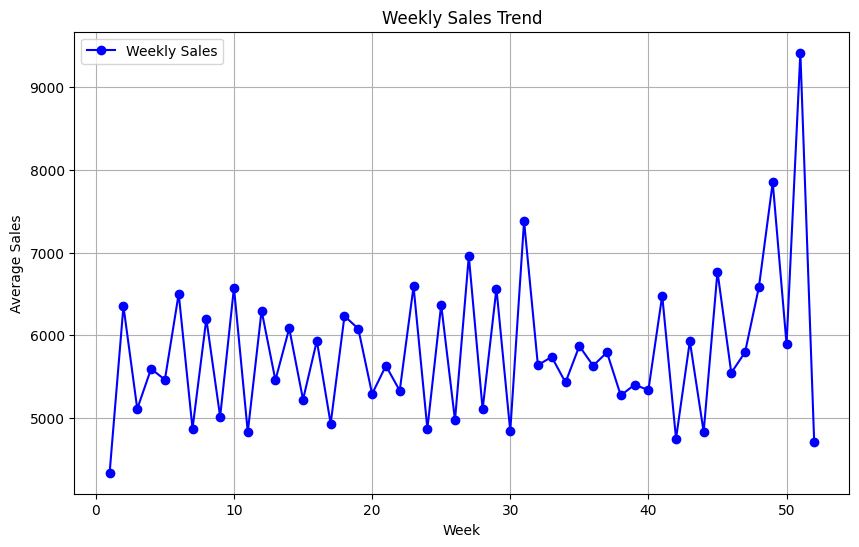

In [51]:
# Extract Week from Date if not already done
merged_data['Week'] = merged_data['Date'].dt.isocalendar().week

# Group by Week and calculate average sales
weekly_sales = merged_data.groupby('Week')['Sales'].mean().reset_index()

# Plotting weekly sales trend
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Sales'], label='Weekly Sales', color='blue', marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()


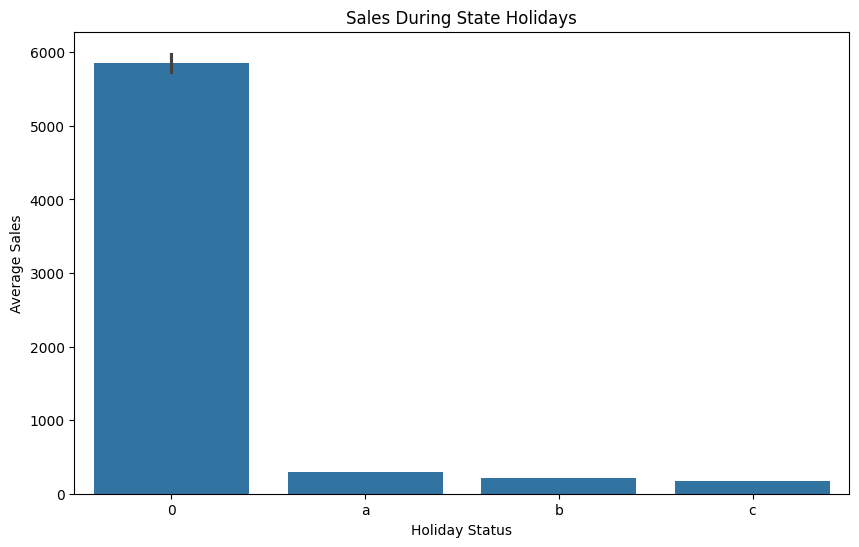

In [52]:
# Group by StateHoliday and calculate average sales
holiday_sales = merged_data.groupby('StateHoliday')['Sales'].mean().reset_index()

# Plotting holiday sales impact
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
plt.title('Sales During State Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Average Sales')
plt.show()


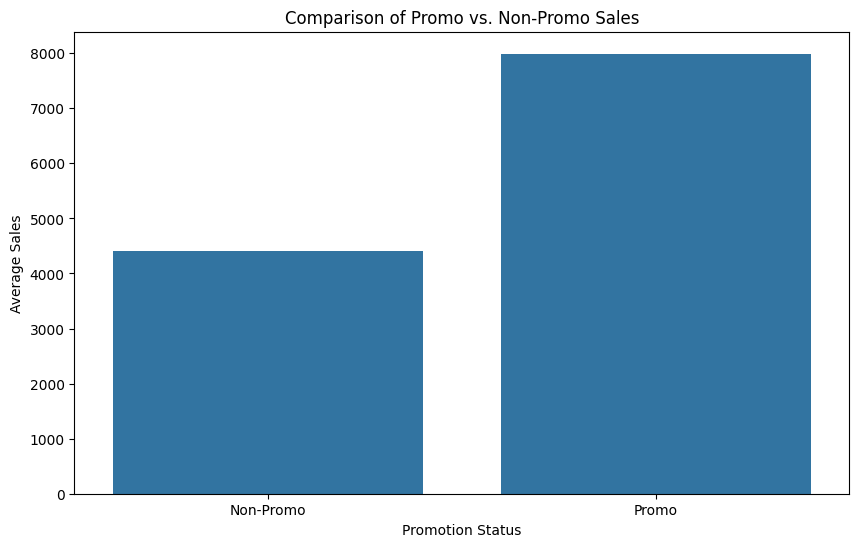

In [53]:
# Assuming 'Promo' column indicates whether a sale is during a promotion (1 for promo, 0 for non-promo)
# Group by Promo and calculate average sales
promo_comparison = merged_data.groupby('Promo')['Sales'].mean().reset_index()

# Map Promo values to 'Promo' and 'Non-Promo' for better labeling
promo_comparison['Promo'] = promo_comparison['Promo'].map({1: 'Promo', 0: 'Non-Promo'})

# Plotting promo vs. non-promo sales comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_comparison)
plt.title('Comparison of Promo vs. Non-Promo Sales')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.show()
